# Visualizing Confusion Matrices - Lab

## Introduction

In this lab, you'll build upon the previous lesson on confusion matrices and visualize a confusion matrix using `matplotlib`. 

## Objectives

In this lab you will:  

- Create a confusion matrix from scratch 
- Create a confusion matrix using scikit-learn 
- Craft functions that visualize confusion matrices 

## Confusion matrices

Recall that the confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives, and False Negatives. This can further be visualized when analyzing the effectiveness of our classification algorithm.   
  
Here's an example of how a confusion matrix is displayed:
<img src="./images/new_confusion_matrix_2.png" width="350">

With that, let's look at some code for generating this kind of visual.

## Create our model
As usual, we start by fitting a model to data by importing, normalizing, splitting into train and test sets and then calling your chosen algorithm. All you need to do is run the following cell. The code should be familiar to you. 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Normalize the data
for col in df.columns:
    df[col] = (df[col] - min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Create the confusion matrix

To gain a better understanding of confusion matrices, complete the `conf_matrix()` function in the cell below.  This function should:

* Take in two arguments: 
    * `y_true`, an array of labels
    * `y_pred`, an array of model predictions
* Return a confusion matrix in the form of a dictionary, where the keys are `'TP', 'TN', 'FP', 'FN'`  

In [ ]:
def conf_matrix(y_true, y_pred):
    pass



# Test the function
conf_matrix(y_test, y_hat_test)
# Expected output: {'TP': 39, 'TN': 24, 'FP': 9, 'FN': 4}

## Check your work with `sklearn`

To check your work, make use of the `confusion_matrix()` function found in `sklearn.metrics` and make sure that `sklearn`'s results match up with your own from above.

- Import the `confusion_matrix()` function
- Use it to create a confusion matrix for `y_test` versus `y_hat_test`, as above 

In [2]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[24  9]
 [ 4 39]]


## Create a nice visual

Creating a pretty visual is a little more complicated. Generating the initial image is simple but you'll have to use the `itertools` package to iterate over the matrix and append labels to the individual cells. In this example, `cnf_matrix` is the result of the scikit-learn implementation of a confusion matrix from above.

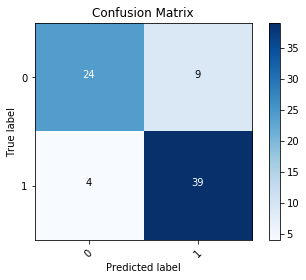

In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

## Create a general function that plots the confusion matrix
Generalize the above code into a function that you can reuse to create confusion matrix visuals going forward: 

- `cm`: confusion matrix
- `classes`: the class labels 


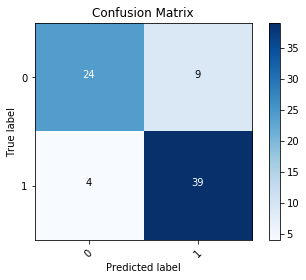

In [7]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
        # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = classes # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

    # Add a legend
    plt.colorbar()
    plt.show()
    
plot_confusion_matrix(cnf_matrix, [0,1])    

## Update your function to include an option for normalization 
When the normalization parameter is set to `True`, your function should return percentages for each class label in the visual rather than raw counts: 

[[24  9]
 [ 4 39]]


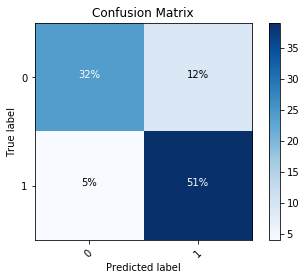

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    if normalize == False:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black')
    else: 
       for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, f'{int(round(cm[i,j]/cm.ravel().sum(),2)*100)}%',
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black') 
    
    # Add a legend
    plt.colorbar()
    plt.show() 
plot_confusion_matrix(cnf_matrix, [0,1], normalize = True)

## Summary
Well done! In this lab, you created a confusion matrix from scratch and honed your `matplotlib` skills by visualizing confusion matrices! 